In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15",18,1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32",35,1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
data_asso_50Hz_reci = data[(data['Ptl_note']=='50Hz EI high freq')&(data['Reci']==1)&(data['Age']>25)]

In [4]:
data_asso_50Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
53,2016120503,29,2,1,1,0,2,"10,11","13,14,15,16,17",6,3,NaN,50Hz EI high freq
56,2016092901,27,2,1,1,0,1,"11,12","17,18,19",6,0,NaN,50Hz EI high freq
58,2016120202,26,1,1,1,0,2,17,"19,20,21,22,23",6,15,"Strong LTD, reduced PPR",50Hz EI high freq
60,2016120504,29,1,1,1,0,2,6,8,6,3,NaN,50Hz EI high freq
62,2017051001,26,2,1,1,1,2,"7,8","10,11,12",6,4,NaN,50Hz EI high freq
63,2017051002,26,2,1,1,0,1,"15,16",18,6,6,NaN,50Hz EI high freq


/src/Patch_ana/Patch_ana/patch_pip.py:572: RuntimeWarning: overflow encountered in exp
  y = np.exp(-1 * t / decay_tau)


<Container object of 3 artists>

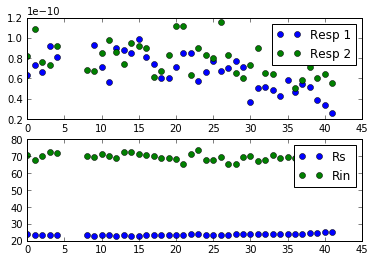

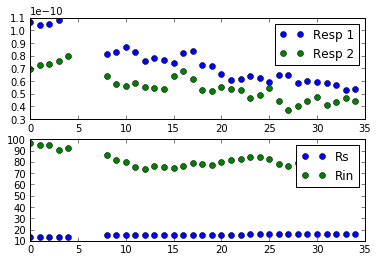

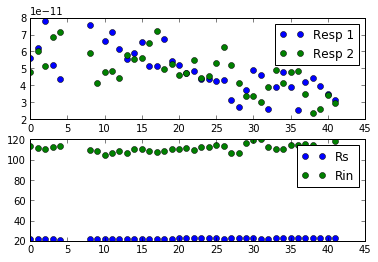

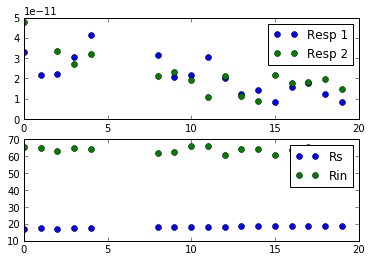

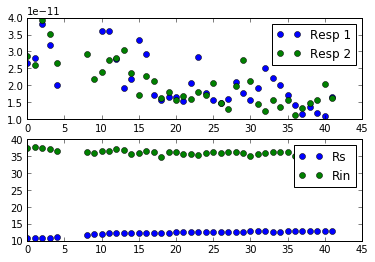

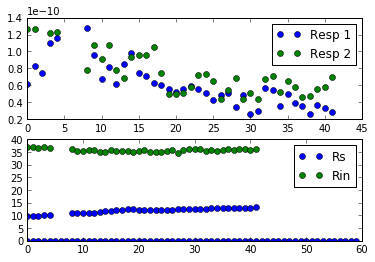

In [5]:
patch_pip.df_ana(data_asso_50Hz_reci,'/data/data_asso_50Hz_reci',end_ana=[50, 40, 50, 17, 50, 50])
asso_50Hz_reci = pd.read_pickle('/data/data_asso_50Hz_reci')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_reci)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [6]:
asso_50Hz_reci['Before'].index

Int64Index([53, 56, 58, 60, 62, 63], dtype='int64')

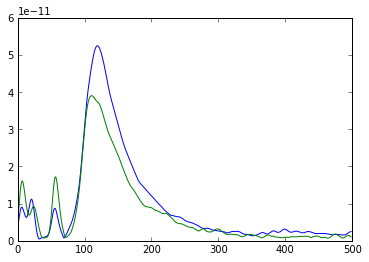

In [7]:
sample_id = 58
plt.plot(np.nanmean(np.vstack(asso_50Hz_reci['Before'].loc[sample_id]['trace_y1'])[:, :500], axis=0))
plt.plot(np.nanmean(np.vstack(asso_50Hz_reci['After'].loc[sample_id]['trace_y1'])[-5:,:500], axis=0))
plt.ylim([0, 6e-11])
with PdfPages('/data/Figure4_2.pdf') as pdf:
    pdf.savefig()

In [8]:
elimi = np.array([50, 40, 50, 17, 50, 50])
elimi_sr = pd.Series(elimi, index=asso_50Hz_reci.index)
asso_50Hz_reci['elimi']=elimi_sr
# asso_50Hz_reci.to_pickle('/data/ana_asso_50Hz_reci')

In [9]:
# Add traces with back spontaneous recording
spon_elimi_bef = {}
spon_elimi_aft = {}
spon_elimi_bef[53] = []   #  6, 36
spon_elimi_bef[56] = []  # 96 156
spon_elimi_bef[58] = [3,30]  # 6-36
spon_elimi_bef[60] = [6] # 36 96
spon_elimi_bef[62] = [] # 36 96
spon_elimi_bef[63] = [27,41,]
spon_elimi_aft[53] = [74, 97, 110]   # 66 126
spon_elimi_aft[56] = [86]  # 36 96
spon_elimi_aft[58] = []  # 66 126
spon_elimi_aft[60] = [34] # 36 96
spon_elimi_aft[62] = [120] # 66 126
spon_elimi_aft[63] = [74,97, 110]# 66 126

In [10]:
asso_50Hz_reci['spon_elimi_bef'] = pd.Series(spon_elimi_bef, index=asso_50Hz_reci.index)
asso_50Hz_reci['spon_elimi_aft'] = pd.Series(spon_elimi_aft, index=asso_50Hz_reci.index)

In [11]:
asso_50Hz_reci.to_pickle('/data/ana_asso_50Hz_reci')

In [12]:
data_asso_50Hz_uni = data[(data['Ptl_note']=='50Hz EI high freq')&(data['Reci']==0)]

In [13]:
data_asso_50Hz_uni

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
52,2016103101,30,1,1,0,0,2,22,"25,26,27,28,29,30,31,32,33",6,15,NaN,50Hz EI high freq
54,2017050901,25,2,1,0,0,1,12,15,6,15,NaN,50Hz EI high freq
55,2017052203,33,2,1,0,0,1,"8,9",12,6,16,NaN,50Hz EI high freq
57,2016102101,26,2,1,0,0,2,"31,32,33,34","36,37",6,0,,50Hz EI high freq
59,2016102703,27,2,1,0,1,2,"37,38,39",41,6,0,NaN,50Hz EI high freq


/src/Patch_ana/Patch_ana/patch_pip.py:572: RuntimeWarning: overflow encountered in exp
  y = np.exp(-1 * t / decay_tau)


<Container object of 3 artists>

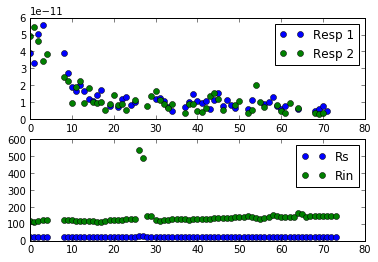

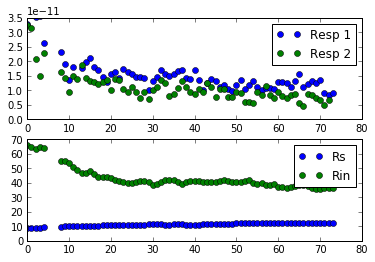

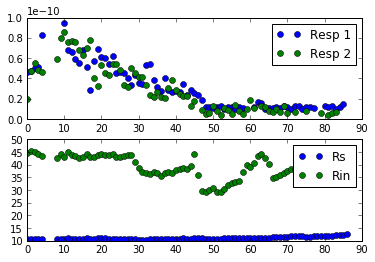

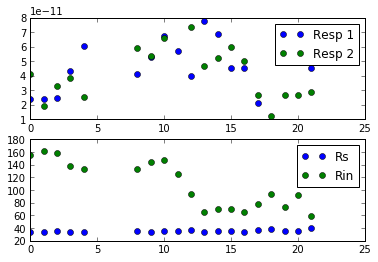

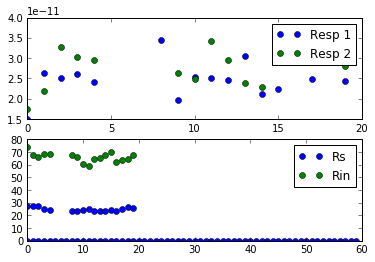

In [14]:
patch_pip.df_ana(data_asso_50Hz_uni,'/data/data_asso_50Hz_uni')
asso_50Hz_uni = pd.read_pickle('/data/data_asso_50Hz_uni')
ave_ptl_mean, ave_ptl_ste = patch_pip.sample_plot(asso_50Hz_uni)
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')